In [1]:
using Pkg
Pkg.activate("../")
#When running for the first time use:
#Pkg.instantiate()
using QuantumAutomorphismGroups
using Oscar

  Activating project at `~/Documents/UniStuff/matroid+quantum+groups/QuantumAutomorphismGroups.jl`


In [2]:
#To get the Relations defining the Quantum Symmetric Group use
generators, _, u, Alg = getQuantumPermutationGroup(3)
generators

51-element Vector{AbstractAlgebra.Generic.FreeAssAlgElem{QQFieldElem}}:
 u[1,1]^2 - u[1,1]
 u[1,2]^2 - u[1,2]
 u[1,3]^2 - u[1,3]
 u[2,1]^2 - u[2,1]
 u[2,2]^2 - u[2,2]
 u[2,3]^2 - u[2,3]
 u[3,1]^2 - u[3,1]
 u[3,2]^2 - u[3,2]
 u[3,3]^2 - u[3,3]
 u[1,1] + u[1,2] + u[1,3] - 1
 u[2,1] + u[2,2] + u[2,3] - 1
 u[3,1] + u[3,2] + u[3,3] - 1
 u[1,1] + u[2,1] + u[3,1] - 1
 ⋮
 u[3,1]*u[3,2]
 u[1,3]*u[2,3]
 u[3,1]*u[3,3]
 u[1,3]*u[3,3]
 u[3,2]*u[3,1]
 u[2,3]*u[1,3]
 u[3,2]*u[3,3]
 u[2,3]*u[3,3]
 u[3,3]*u[3,1]
 u[3,3]*u[1,3]
 u[3,3]*u[3,2]
 u[3,3]*u[2,3]

In [3]:
#To get the Relations defining Aut_B(M) use
M = uniform_matroid(3,4)
generators,_ ,u, Alg = getMatroidRelations(M,:bases) #Switch :bases with :circuits, :rank, :flats to get the other Aut_*(M)
generators

2040-element Vector{AbstractAlgebra.Generic.FreeAssAlgElem{QQFieldElem}}:
 u[1,1]^2 - u[1,1]
 u[1,2]^2 - u[1,2]
 u[1,3]^2 - u[1,3]
 u[1,4]^2 - u[1,4]
 u[2,1]^2 - u[2,1]
 u[2,2]^2 - u[2,2]
 u[2,3]^2 - u[2,3]
 u[2,4]^2 - u[2,4]
 u[3,1]^2 - u[3,1]
 u[3,2]^2 - u[3,2]
 u[3,3]^2 - u[3,3]
 u[3,4]^2 - u[3,4]
 u[4,1]^2 - u[4,1]
 ⋮
 u[4,1]*u[3,2]*u[2,1]
 u[1,4]*u[2,3]*u[1,2]
 u[4,1]*u[3,2]*u[2,2]
 u[1,4]*u[2,3]*u[2,2]
 u[4,2]*u[3,1]*u[2,2]
 u[2,4]*u[1,3]*u[2,2]
 u[4,2]*u[3,2]*u[2,1]
 u[2,4]*u[2,3]*u[1,2]
 u[4,2]*u[3,2]*u[2,2]
 u[2,4]*u[2,3]*u[2,2]
 u[4,1]*u[3,1]*u[2,1]
 u[1,4]*u[1,3]*u[1,2]

In [4]:
#Before checking if this Ideal defines a quantum group with symmetries, we need a nc-groebner_basis:
gb = groebner_basis(generators)

2074-element Vector{AbstractAlgebra.Generic.FreeAssAlgElem{QQFieldElem}}:
 u[1,1]^2 - u[1,1]
 u[1,2]^2 - u[1,2]
 u[1,3]^2 - u[1,3]
 u[1,4]^2 - u[1,4]
 u[2,1]^2 - u[2,1]
 u[2,2]^2 - u[2,2]
 u[2,3]^2 - u[2,3]
 u[2,4]^2 - u[2,4]
 u[3,1]^2 - u[3,1]
 u[3,2]^2 - u[3,2]
 u[3,3]^2 - u[3,3]
 u[3,4]^2 - u[3,4]
 u[4,1]^2 - u[4,1]
 ⋮
 -u[4,3]*u[3,4]*u[2,2] - u[4,4]*u[3,3]*u[2,2] + u[3,3]*u[2,2] + u[3,4]*u[2,2] + u[4,3]*u[2,2] + u[4,4]*u[2,2] - u[2,2]
 -u[4,2]*u[2,4]*u[4,2] + u[4,2]*u[2,4]
 u[2,2]*u[4,4] + u[2,3]*u[4,4] - u[4,4]*u[2,2] - u[4,4]*u[2,3]
 -u[2,3]*u[4,2] - u[2,4]*u[4,2] - u[4,3]*u[2,2] - u[4,3]*u[2,4] - u[4,4]*u[2,2] - u[4,4]*u[2,3] + u[2,2] + u[2,3] + u[2,4] + u[4,2] + u[4,3] + u[4,4] - 1
 u[3,4]*u[4,3] - u[4,3]*u[3,4]
 u[3,4]*u[4,2] - u[4,2]*u[3,4]
 -u[3,2]*u[2,4] - u[3,3]*u[2,4] - u[3,4]*u[2,2] - u[3,4]*u[2,3] - u[4,2]*u[2,4] - u[4,2]*u[3,4] - u[4,3]*u[2,4] - u[4,3]*u[3,4] - u[4,4]*u[2,2] - u[4,4]*u[2,3] - u[4,4]*u[3,2] - u[4,4]*u[3,3] + u[2,2] + u[2,3] + 2*u[2,4] + u[3,2] + u[3,3] 

In [5]:
#Now we can check if the ideal generated by the nc-gb contains a commutator
ideal_membership(u[1,2]*u[4,3]-u[4,3]*u[1,2],gb)

false

# Timings

This is a demo to show the difference in speed between the two algorithms used to compute the Groebner basis. 

 - If no `deg_bound` is given as an argument, the algorithm implemented in Oscar is used. This may not terminate.
 - If a `deg_bound` is given as an argument, the computations are done in the singular. This is much faster for non-trivial examples and guarantees termination. But it will only return a truncated Groebner basis. This may or may not be the full Groebner basis.

In [6]:
H1 = matroid_from_bases([[2, 3], [2, 4], [3, 4], [2, 5], [3, 5], [4, 5], [2, 6], [3, 6], [4, 6], [5, 6]],6)

Matroid of rank 2 on 6 elements

In [7]:
generators, _, _ = getMatroidRelations(M,:bases);
length(generators)

2040

In [8]:
# The Version implemented in Abstract Algebra without a degree bound
@time gb1 = groebner_basis(generators);

 11.387819 seconds (70.55 M allocations: 5.061 GiB, 21.48% gc time, 0.32% compilation time)


In [9]:
#Finding the maximum degree is a bit tedious, but it will give a good degree bound for the alternative way of computing a Groebner basis
reduce(max, map(x -> reduce(max, length.(x.exps)), gb1))

3

In [10]:
# We will recompute the generators since Oscar night cache the resulting Groebner basis from before.
generators, _, _ = getMatroidRelations(M,:bases);

In [11]:
@time groebner_basis(generators,4);

  0.970318 seconds (3.84 M allocations: 251.235 MiB, 17.66% compilation time)


Comparing the computation times for the Gröbner bases computed, we can see that the singular method has a huge speed advantage for larger Gröbner bases.

In [12]:
#The functions used to create the statistic are in an additional file
include("../computation/timing_report.jl");
df=get_unified_df();
print(df)

260×6 DataFrame
 Row │ Name            deg_bound4        deg_bound10       deg_bound15       no_deg_bound      max_deg 
     │ String          Float64           Float64           Float64           Float64           Int64   
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ r1n2_1               1.11175           1.00121           1.10104           0.187516           2
   2 │ r1n3_1               0.000955843       0.00107741        0.00136839        0.00426432         2
   3 │ r1n3_3               0.000857382       0.000979974       0.00125666        0.00464818         2
   4 │ r1n4_3               0.0019228         0.00241347        0.00357133        0.0164827          2
   5 │ r1n4_1               0.0053548         0.00694065        0.010243          0.0177544          2
   6 │ r1n4_7               0.00587667        0.00761283        0.0110281         0.0202465          2
   7 │ r2n4_01              0.0174849         0.020540

Plotting this result will show this observation quite clearly. The plot shows the comparison of the speed taken by the non-commutative Buchberger algorithm with the time taken by the Letterplace algorithm using 4, 10 and 15 as degree bounds. If a data point is on the diagonal, it means that both algorithms would take the same time to compute the Groebner basis, left of the diagonal means that the Letterplace algorithm is slower. The group of crosses to the right of the diagonal indicates that the Letterplace algorithm is faster for this example.

The group of crosses to the right of the graph shows Gröbner bases for which the non-commutative Buchberger algorithm didn't finish in the given time (1 week).

The last plot is a histogram of the maximum degree of a resulting Gröbner basis. This shows us that most Gröbner bases end up with degree 3, which motivates the choice of the degree bound used in the letterplace algorithm.

The warnings printed come from a Plots.jl bug

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict

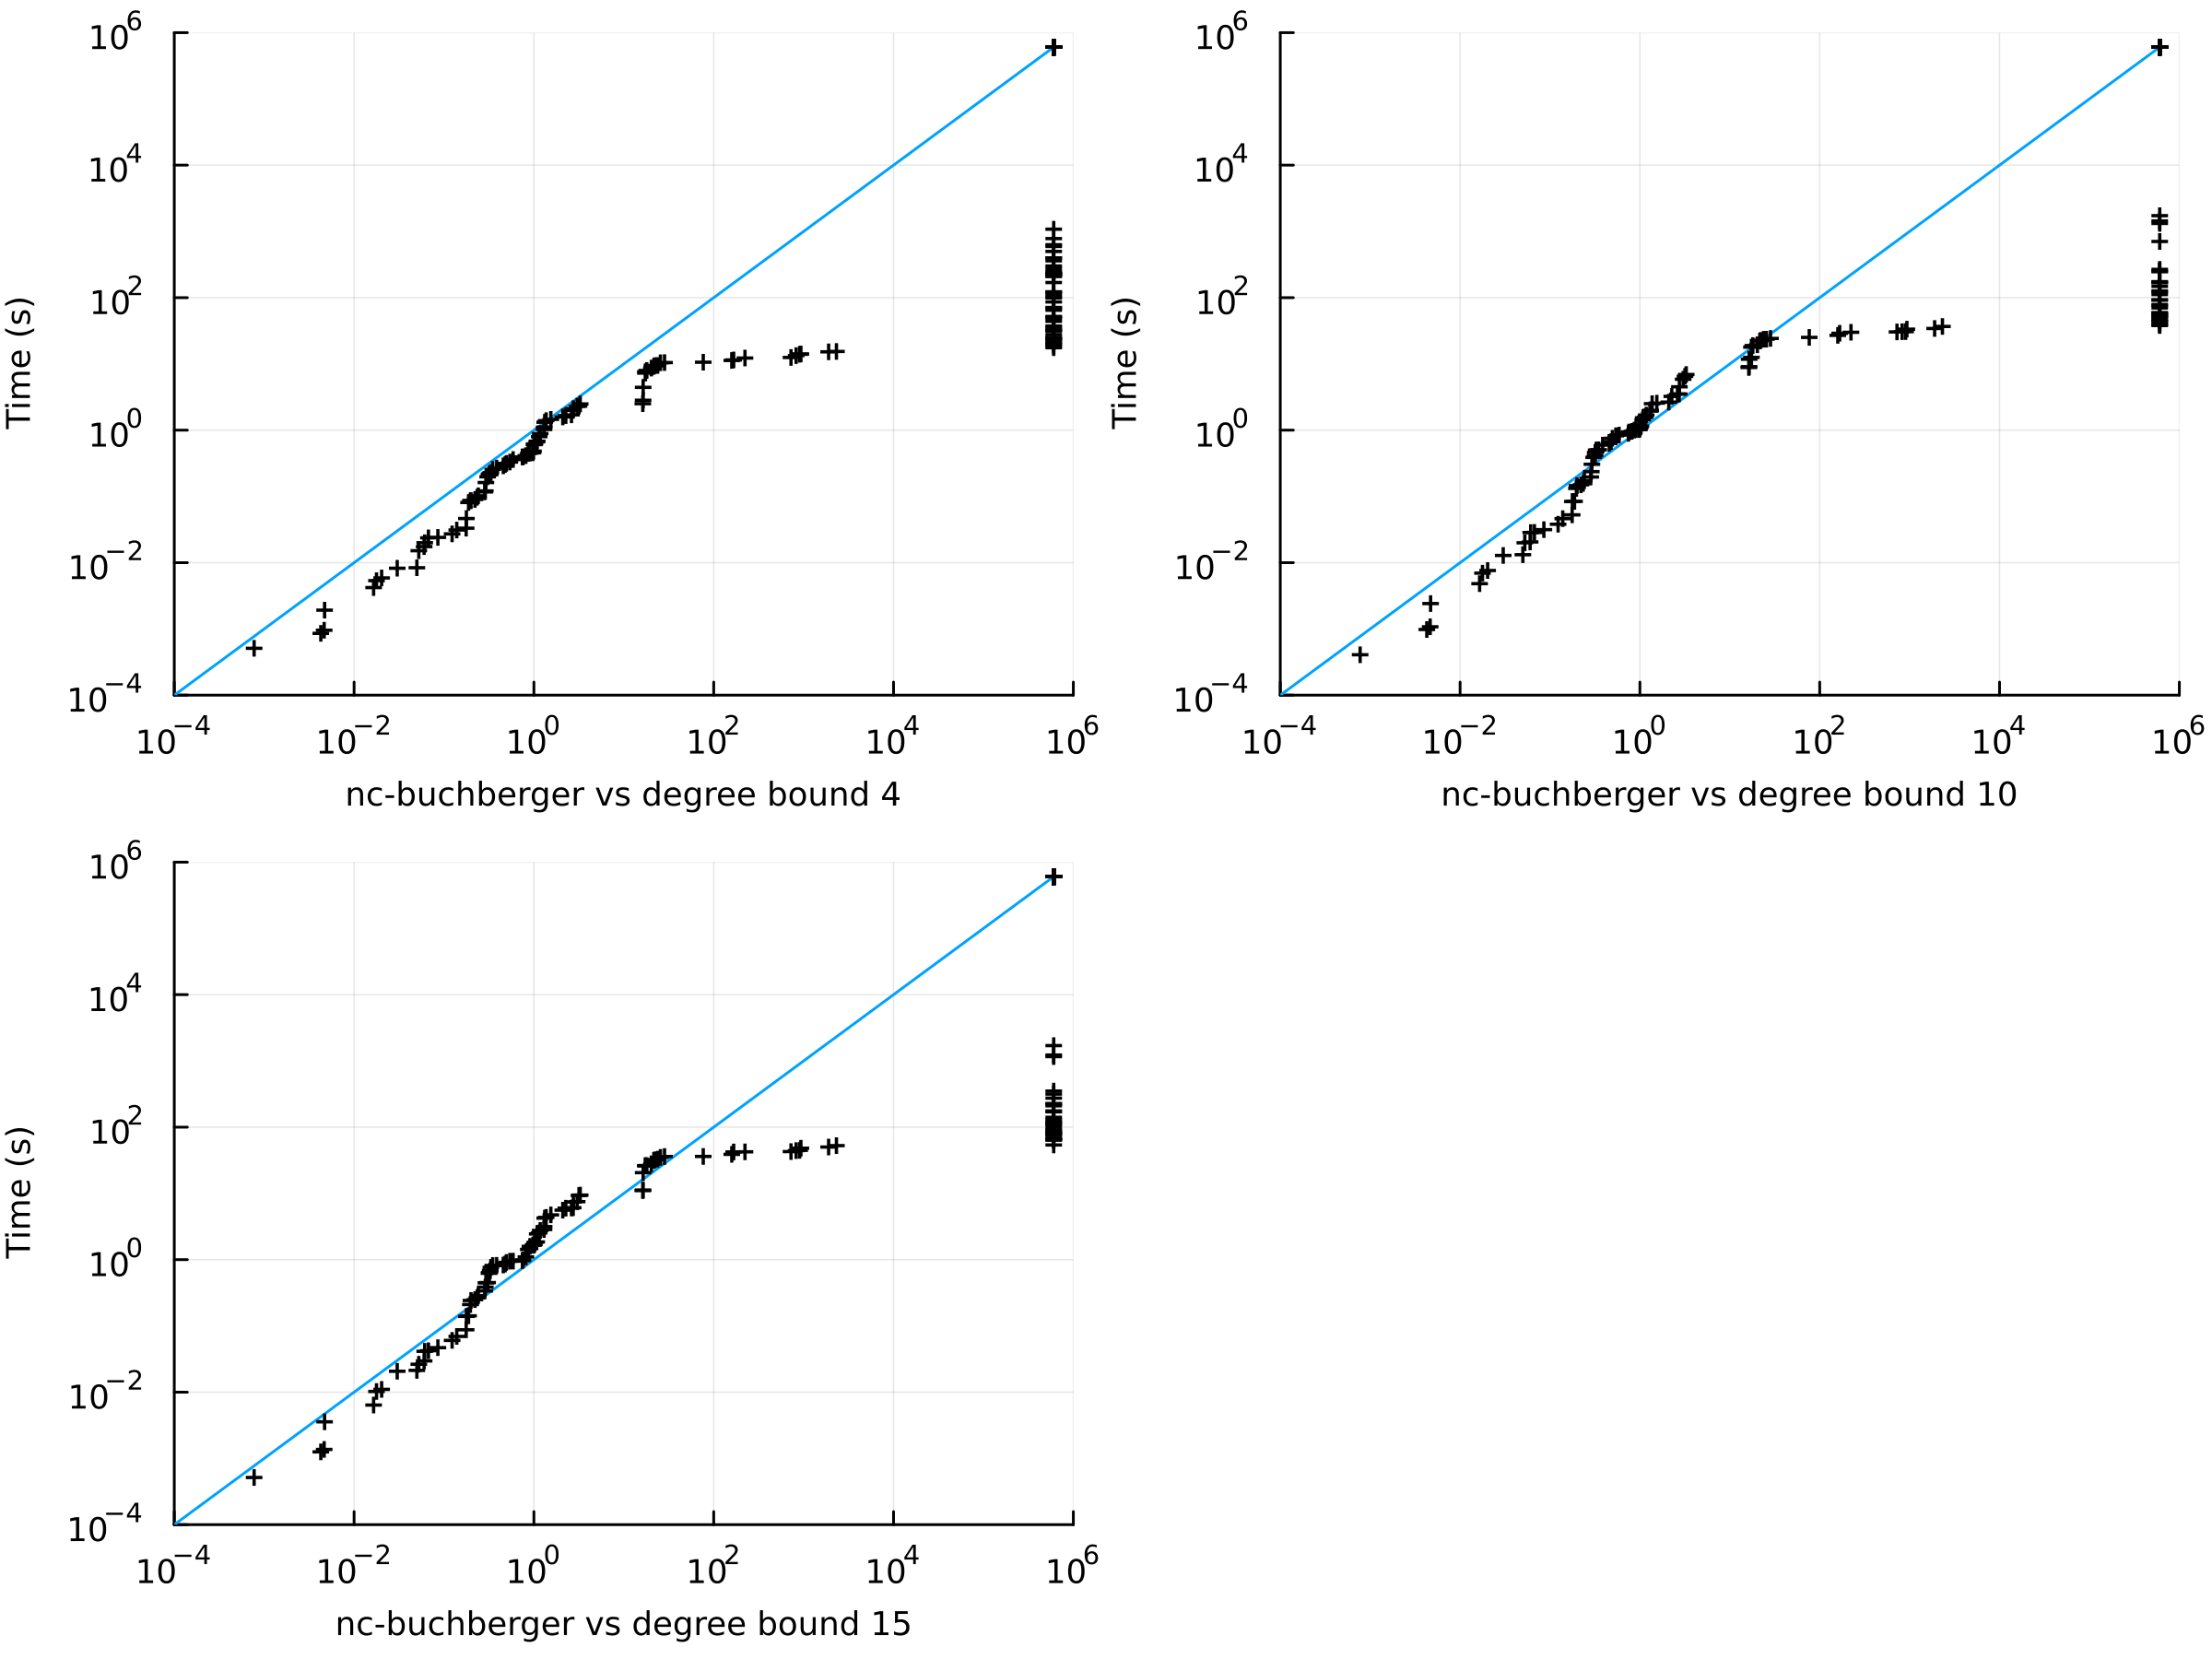

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194


In [13]:
print_speed_comparison()